# Project Overview
Heart disease is a critical health issue globally, accounting for a significant percentage of deaths each year. Early detection can enable timely intervention, potentially saving lives and improving patient outcomes. This project leverages machine learning to develop a predictive model using patient data to estimate the likelihood of heart disease. The goal is to assist healthcare providers in identifying high-risk individuals for further diagnostic evaluation.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('heart.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


# objectives


The objective of this project is to develop a reliable machine learning model to predict the likelihood of heart disease, enabling early diagnosis and intervention. By analyzing clinical and diagnostic features, the project aims to identify key risk factors, optimize model performance, and create a user-friendly interface for real-time predictions. This tool is designed to assist healthcare providers in making data-driven decisions, prioritizing high-risk patients, and supporting preventive healthcare efforts to reduce the burden of heart disease.

# Steps Undertaken
1. Data Loading and Exploration
The dataset was loaded and explored to understand its structure and contents.

Dataset: heart.csv
Key commands used:
df.info(): Displayed dataset structure and non-null count.
df.head(): Previewed the first few rows of the dataset.
df.columns, df.describe(), df.shape: Provided metadata and statistical summary.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [ ]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [ ]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
df.shape

(1025, 14)

# 2. Data Cleaning
Checked for missing values using df.isnull().sum().
Confirmed data types with df.dtypes.
Dropped less relevant or weakly correlated features: restecg, fbs, chol, trestbps, age, and sex.

In [ ]:
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [ ]:
df.dtypes

,0
age,int64
sex,int64
cp,int64
trestbps,int64
chol,int64
fbs,int64
restecg,int64
thalach,int64
exang,int64
oldpeak,float64


# 3. Data Visualization
Target Distribution: Visualized using sns.countplot to understand the balance of heart disease outcomes.
Correlation Analysis: Used a heatmap (sns.heatmap) to evaluate feature interdependencies and eliminate redundant features.
Histograms: Plotted to examine feature distributions, including the effect of log transformation for skewed data.

<Axes: xlabel='target', ylabel='count'>

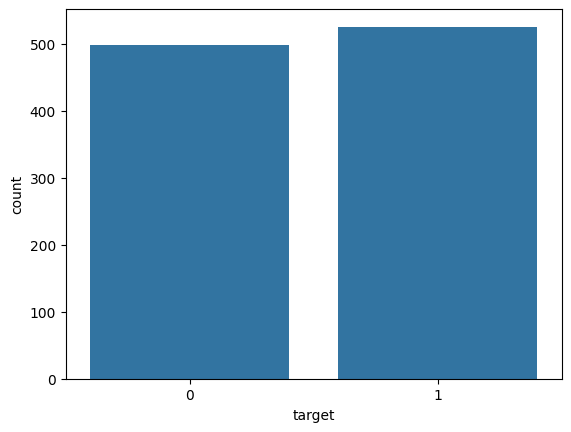

In [ ]:
sns.countplot(x="target",data=df)

In [ ]:
correlation=df.corr()

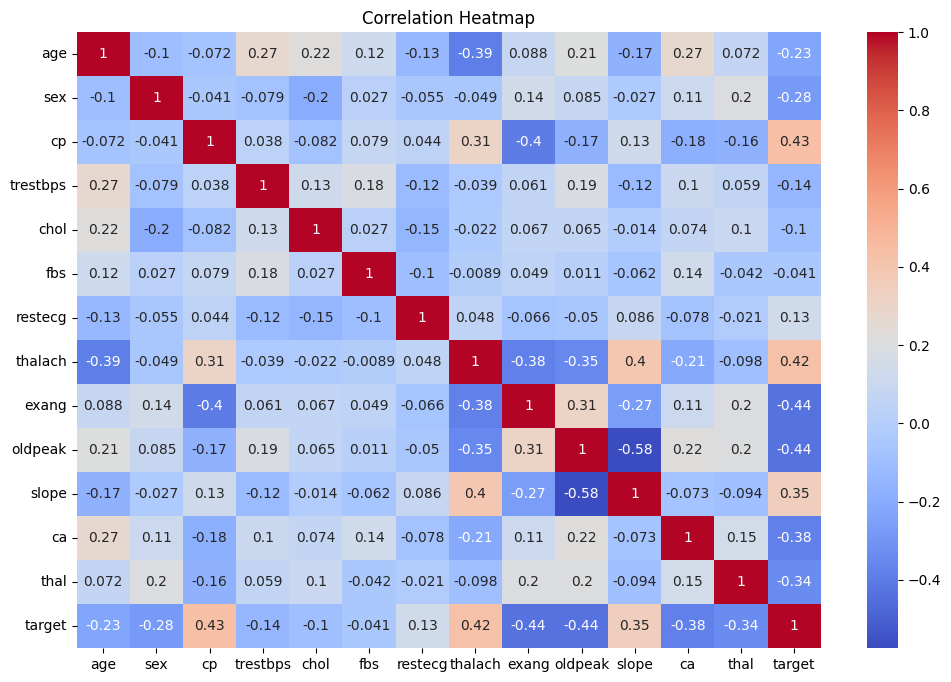

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(correlation,annot=True,cmap="coolwarm")
plt.title('Correlation Heatmap')
plt.show()

array([[<Axes: title={'center': 'cp'}>,
        <Axes: title={'center': 'thalach'}>,
        <Axes: title={'center': 'exang'}>],
       [<Axes: title={'center': 'oldpeak'}>,
        <Axes: title={'center': 'slope'}>,
        <Axes: title={'center': 'ca'}>],
       [<Axes: title={'center': 'thal'}>,
        <Axes: title={'center': 'target'}>, <Axes: >]], dtype=object)

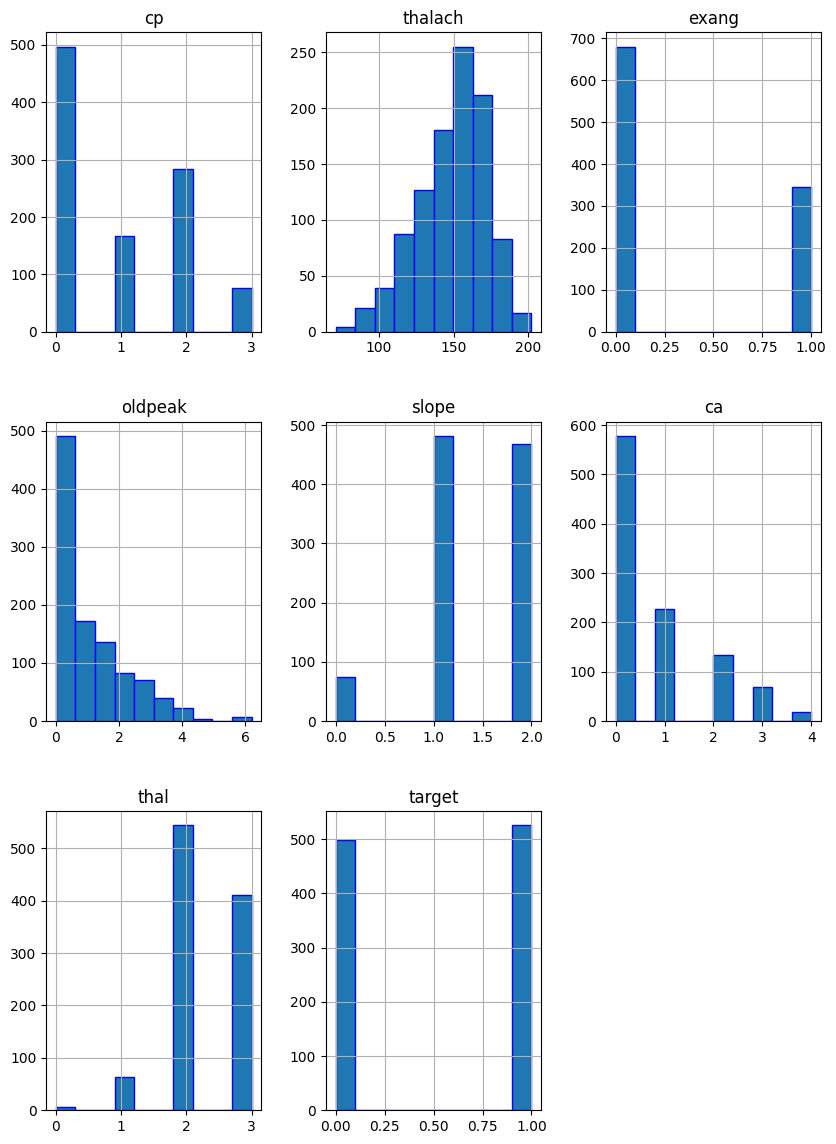

In [ ]:
df.hist(edgecolor="b",figsize=[10,14])

In [ ]:
df.drop(['restecg'],axis=1,inplace=True)
df.drop(['fbs'],axis=1,inplace=True)
df.drop(['chol'],axis=1,inplace=True)
df.drop(['trestbps'],axis=1,inplace=True)
df.drop(['age'],axis=1,inplace=True)
df.drop(['sex'],axis=1,inplace=True)


In [ ]:
df.shape

(1025, 8)

# 4. Feature Transformation
Log transformation (np.log(df+1)) was applied to reduce skewness in the feature distributions, improving model interpretability and performance.

5. Feature Selection
The selected features were:

cp (Chest Pain Type)
thalach (Maximum Heart Rate Achieved)
exang (Exercise-Induced Angina)
oldpeak (ST Depression Induced by Exercise)
slope (Slope of Peak Exercise ST Segment)
ca (Number of Major Vessels Colored by Fluoroscopy)
thal (Thalassemia)

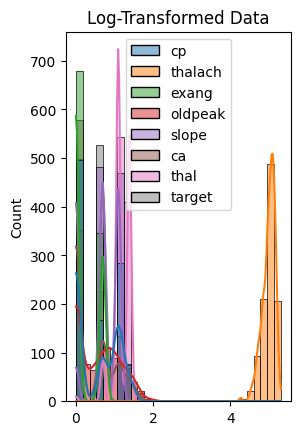

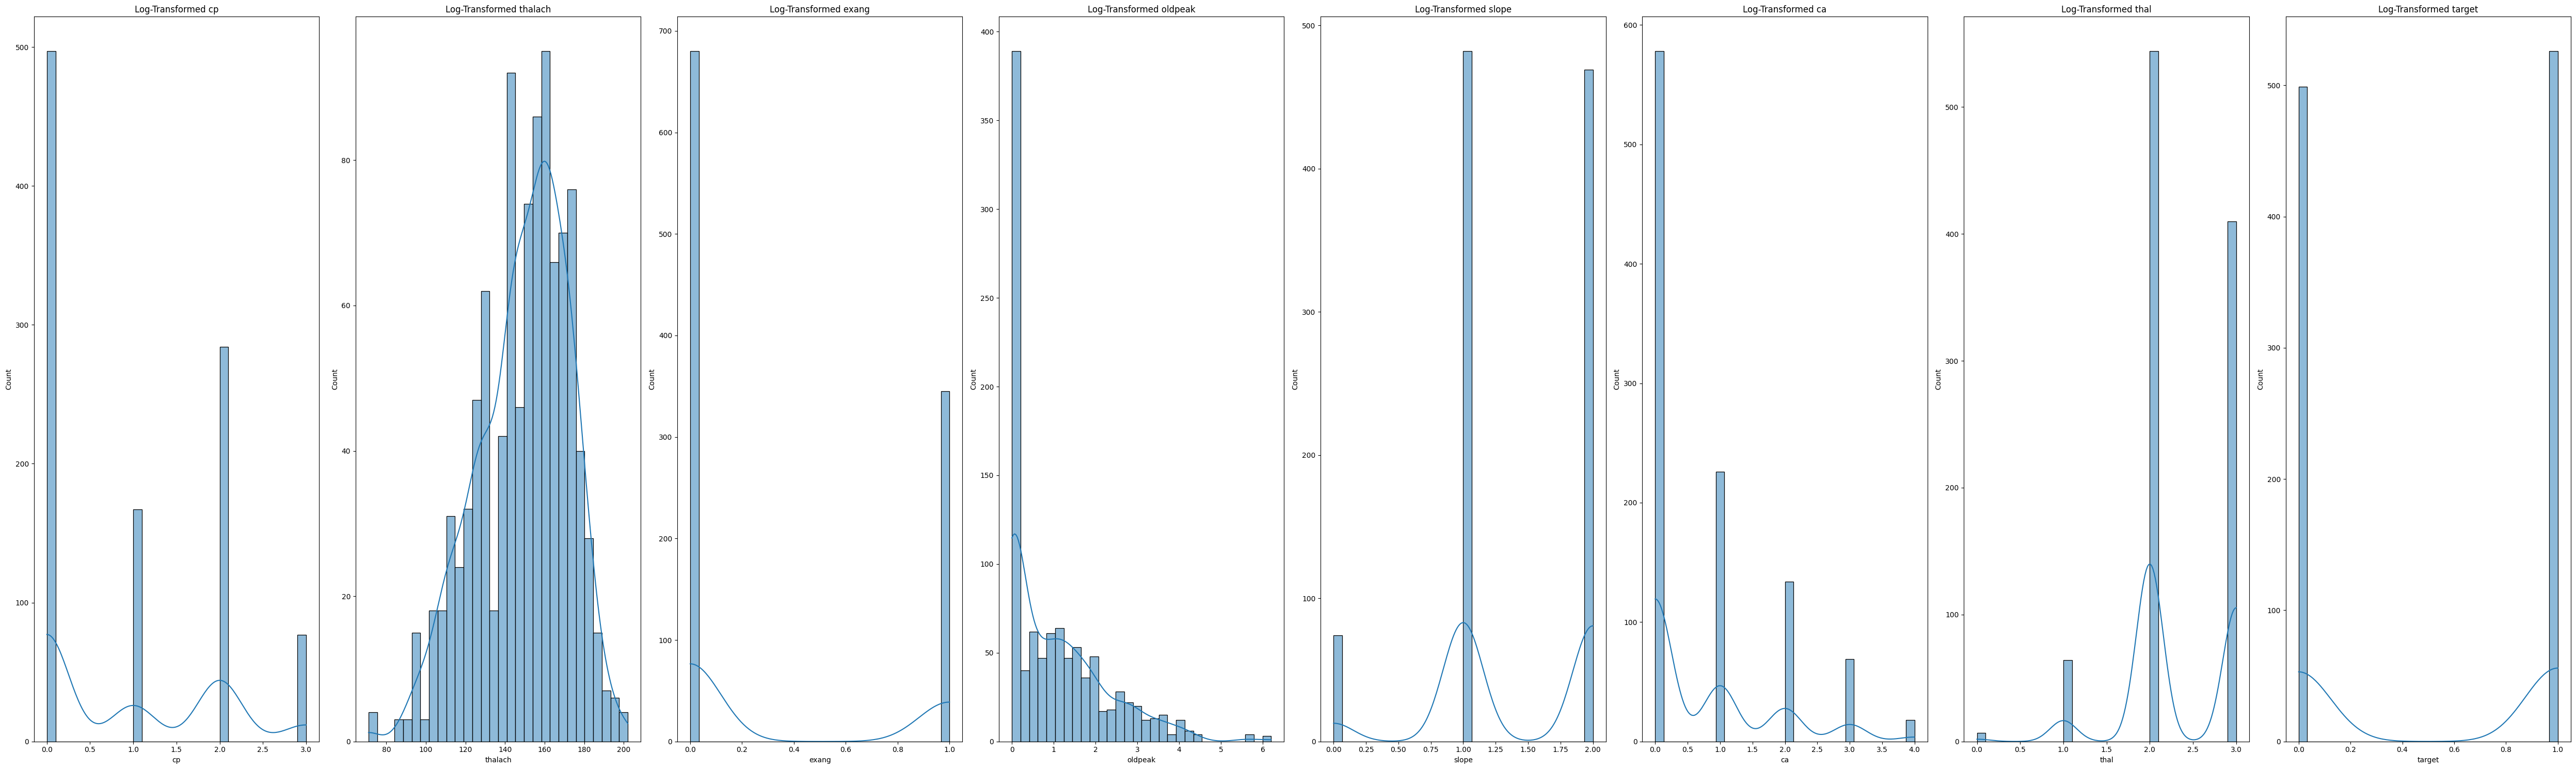

In [ ]:
data=np.log(df+1)

# Plotting log-transformed data distribution
plt.subplot(1,2,2)
sns.histplot(data, bins=30, kde=True)
plt.title("Log-Transformed Data")
plt.show()

# Assuming df is a DataFrame with multiple features
num_features = df.shape[1]  # Number of features
plt.figure(figsize=(50, 15))  # Adjust the figure size as needed

for i, column in enumerate(df.columns, 1):
    plt.subplot(1, num_features, i)  # Adjust layout for each feature
    sns.histplot(df[column], bins=30, kde=True)
    plt.title(f"Log-Transformed {column}")

plt.tight_layout()
plt.show()

In [ ]:
data.columns

Index(['cp', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'], dtype='object')

In [ ]:
data['target'] = (data['target'] > 0.5).astype(int)
x=data[['cp', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']]
y=data['target']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import RidgeClassifier,LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# 6. Splitting Data
Data was split into training and testing sets:

* 80% for training, 20% for testing.
* train_test_split was used with a random_state=42 for reproducibility.

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
model=RandomForestClassifier()
model.fit(x_train,y_train)

RandomForestClassifier()

In [ ]:
y_pred=model.predict(x_test)
y_pred

array([1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0])

In [ ]:
from sklearn.metrics import precision_score,recall_score, f1_score, accuracy_score

In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average="weighted"))

print('Recall:', recall_score(y_test, y_pred, average="weighted"))

print('F1 Score:', f1_score(y_test, y_pred, average="weighted"))

Accuracy: 0.9853658536585366
Precision: 0.9857839721254356
Recall: 0.9853658536585366
F1 Score: 0.9853637641109759


In [ ]:
data

,cp,thalach,exang,oldpeak,slope,ca,thal,target
0,0.000000,5.129899,0.000000,0.693147,1.098612,1.098612,1.386294,0
1,0.000000,5.049856,0.693147,1.410987,0.000000,0.000000,1.386294,0
2,0.000000,4.836282,0.693147,1.280934,0.000000,0.000000,1.386294,0
3,0.000000,5.087596,0.000000,0.000000,1.098612,0.693147,1.386294,0
4,0.000000,4.672829,0.000000,1.064711,0.693147,1.386294,1.098612,0
...,...,...,...,...,...,...,...,...
1020,0.693147,5.105945,0.693147,0.000000,1.098612,0.000000,1.098612,1
1021,0.000000,4.955827,0.693147,1.335001,0.693147,0.693147,1.386294,0
1022,0.000000,4.779123,0.693147,0.693147,0.693147,0.693147,1.098612,0
1023,0.000000,5.075174,0.000000,0.000000,1.098612,0.000000,1.098612,1


In [ ]:
cp=float(input("Enter cp:"))
thalach=float(input("Enter thalach:"))
exang=float(input("Enter exang:"))
oldpeak=float(input("Enter oldpeak:"))
slope=float(input("Enter slope:"))
ca=float(input("Enter ca:"))
thal=float(input("Enter thal:"))
user_input=[[cp,thalach,exang,oldpeak,slope,ca,thal]]
heart=model.predict(user_input)
print("heart: ",heart)

Enter cp:0.69
Enter thalach:5.10
Enter exang:0.69
Enter oldpeak:0.00
Enter slope:1.09
Enter ca:0.00
Enter thal:1.09
heart:  [1]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
